# Comcast Telecom Consumer Complaints

### DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

### <u>Data Dictionary</u>

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone

### <u>Analysis Task</u>

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
> Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
> Which state has the maximum complaints
>> Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [255]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###  Import data into Python environment.

In [225]:
#Importing CCTC(Comcast Telecom Consumer Complaints) Dataset into python environment
path=r'D:\Python Simplilearn Material\Comcast Telecom Consumer Complaints'
CTCC_Data=pd.read_csv(path+r'\Comcast_telecom_complaints_data.csv')

In [226]:
#Displaying the starting 5 rows of CTCC Dataset
CTCC_Data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [227]:
print('Dimensions of the Dataset',CTCC_Data.shape)
print('Size of the Dataset',CTCC_Data.shape)

Dimensions of the Dataset (2224, 11)
Size of the Dataset (2224, 11)


In [228]:
#Getting the information of the dataset
CTCC_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


*From the above information we can see that there are 2224 rows and 11 columns in the dataset and all the columns has non-null values*

In [229]:
#Cross checking for number of missing values to treat them in case if present
print('Number of missing values:\n',CTCC_Data.isnull().sum())

Number of missing values:
 Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64


*From the above result we can conculde that there are no missing values present in the Comcast Telecom Consumer Complaints(CTCC) Dataset,hence we can proceed to perform the analysis tasks*

### 1. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [230]:
# Creating a new columns 'Date_New' (by adding Date_month_year with Time) and 'Day of the Month'  
CTCC_Data['Date_New'] = CTCC_Data['Date_month_year'] + ' ' + CTCC_Data['Time']

#Converting 'Date','Date_month_year' and 'Date_New' to Datetime Format
CTCC_Data['Date_New'] = pd.to_datetime(CTCC_Data['Date_New'])
CTCC_Data['Date_month_year'] = pd.to_datetime(CTCC_Data['Date_month_year'])
CTCC_Data['Day of the Month'] = pd.to_datetime(CTCC_Data['Date'])

#Displaying the datset after modification
CTCC_Data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_New,Day of the Month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26


*From the above result we can see the new column Date_New is added to the dataset and also the columns are modified to the required format successfully!*

Text(0.5, 0.98, 'Trend chart showing the number of complaints at monthly granularity levels')

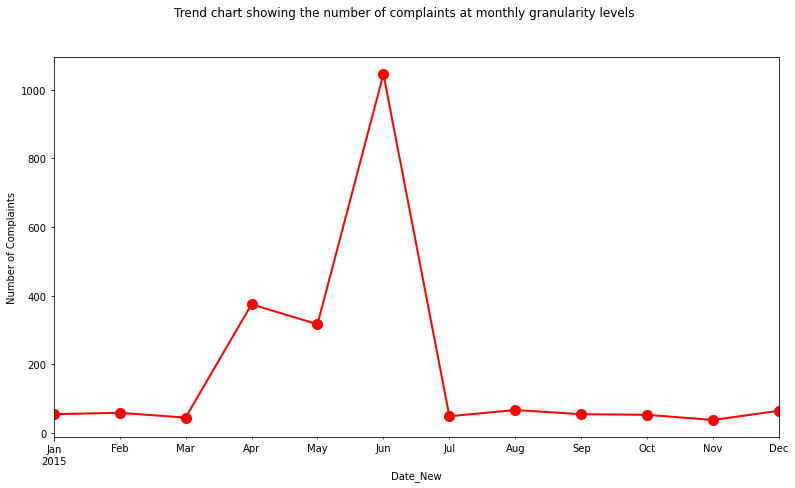

In [231]:
# Trend chart for the number of complaints at monthly granularity levels
CTCC_Data_Monthly = CTCC_Data.set_index(CTCC_Data['Date_New'])
plt.figure(figsize=(13,7))# to increase the plot Size
CTCC_Data_Monthly.groupby(pd.Grouper(freq='M')).size().plot(c="r",lw=2,marker='o',ms=10)
plt.ylabel('Number of Complaints')
plt.suptitle('Trend chart showing the number of complaints at monthly granularity levels')

Text(0.5, 0.98, 'Trend chart showing the number of complaints at daily granularity levels')

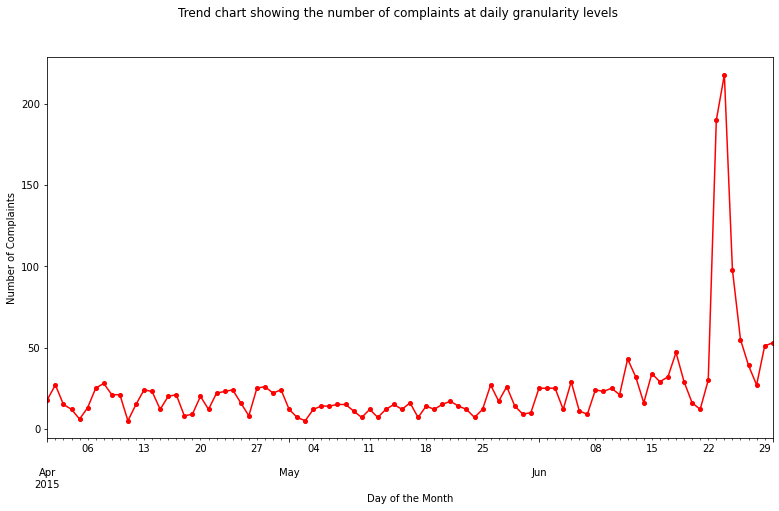

In [232]:
# Trend chart for the number of complaints at daily granularity levels.
CTCC_Data_Daily = CTCC_Data.set_index(CTCC_Data['Day of the Month'])
plt.figure(figsize=(13,7))# to increase the plot Size
CTCC_Data_Daily.groupby(pd.Grouper(freq='D')).size().plot(c="r",lw=1.5,marker='o',ms=4)
plt.ylabel('Number of Complaints')
plt.suptitle('Trend chart showing the number of complaints at daily granularity levels')

### 2. Provide a table with the frequency of complaint types.

In [233]:
# For getting frequency of complaint types first we shall see all the customer complaint types present in the dataset
# and also get the count of complaints that are repeated.
CTCC_Data_Complaint_type = CTCC_Data['Customer Complaint'].value_counts()
CTCC_Data_Complaint_type

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

*The above result might not be proper because of duplicate values in the complaint type,so to make better analysis lets convert all the customer complaints to "Upper Case"*

In [234]:
# Converting all complaint types to upper case 
CTCC_Data_Complaint_type=CTCC_Data['Customer Complaint'].str.upper().value_counts()
CTCC_Data_Complaint_type

COMCAST                                                            102
COMCAST DATA CAP                                                    30
COMCAST INTERNET                                                    29
COMCAST DATA CAPS                                                   21
COMCAST BILLING                                                     18
                                                                  ... 
MONTHLY DATA CAPS                                                    1
COMCAST/XFINITY POOR SERVICE, FRAUDULENT BILLING AND COLLECTION      1
LOST EMAILS/BILLING                                                  1
IMPROPER BILLING AND NON RESOLUTION OF ISSUES                        1
COMCAST, YPSILANTI MI INTERNET SPEED                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

*After converting to "upper case" we can see a reduction of length in the "Customer Complaint" from 1841 to 1740*

In [235]:
#Displaying top 30 complaints since we cannot display the entire table as the data is huge!
CTCC_Data_Complaint_type.head(30)

COMCAST                               102
COMCAST DATA CAP                       30
COMCAST INTERNET                       29
COMCAST DATA CAPS                      21
COMCAST BILLING                        18
COMCAST SERVICE                        15
INTERNET SPEED                         15
UNFAIR BILLING PRACTICES               13
DATA CAPS                              13
DATA CAP                               12
COMCAST COMPLAINT                      11
COMCAST/XFINITY                        11
COMCAST INTERNET SERVICE               10
BILLING                                 9
BILLING ISSUES                          8
COMCAST CABLE                           5
INTERNET                                5
COMCAST BILLING COMPLAINT               5
COMCAST ISSUES                          5
COMCAST BILLING PRACTICES               5
SERVICE ISSUES                          5
SLOW INTERNET                           5
INTERNET SERVICE                        5
COMPLAINT AGAINST COMCAST         

#### Which complaint types are maximum ?
> *From the above table we can clearly say that __COMCAST,COMCAST DATA CAP,COMCAST INTERNET__  are the top 3 most repeated "Customer Complaints" having maximum complaints compared to other domains.*

### 3. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and  Closed & Solved is to be categorized as Closed.

In [236]:
print("Unique values in the Status Variable:\n",CTCC_Data['Status'].unique())

Unique values in the Status Variable:
 ['Closed' 'Open' 'Solved' 'Pending']


*There are __4__ unique values namely closed,open,solved and pending in the status colum*

In [237]:
# Creating a new categorical variable 'New_Status' with value as Open and Closed. 
# Open & Pending as Open 
# Closed & Solved as Closed.
CTCC_Data['New_Status']= ["Open" if Status=="Open" or Status=="Pending" else 
                          "Closed" for Status in CTCC_Data["Status"]]

#Displaying the 1st 5 rows
CTCC_Data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_New,Day of the Month,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,2015-04-22,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,2015-04-08,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,2015-04-18,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,2015-05-07,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,2015-05-26,Closed


*we can see a new categorical variable called __"New_Status"__ is created successfully!*

In [238]:
# lets check whether the modification is done properly in the variable "New_Status"
print("Unique values in the New_Status Variable:\n",CTCC_Data['New_Status'].unique())

Unique values in the New_Status Variable:
 ['Closed' 'Open']


Hence the task to create a new categorical variable 'New_Status'(with values only as Open and Closed) is accomplished.  

### 4. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [239]:
#Performing cross tabulation on'State' and 'New_Status' to get state wise status of complaints
CTCC_Data_State_Wise_Status = pd.crosstab(CTCC_Data['State'],CTCC_Data['New_Status'])
CTCC_Data_State_Wise_Status

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:title={'center':'Stacked Bar Chart Showing State Wise Status of Complaints'}, ylabel='State'>

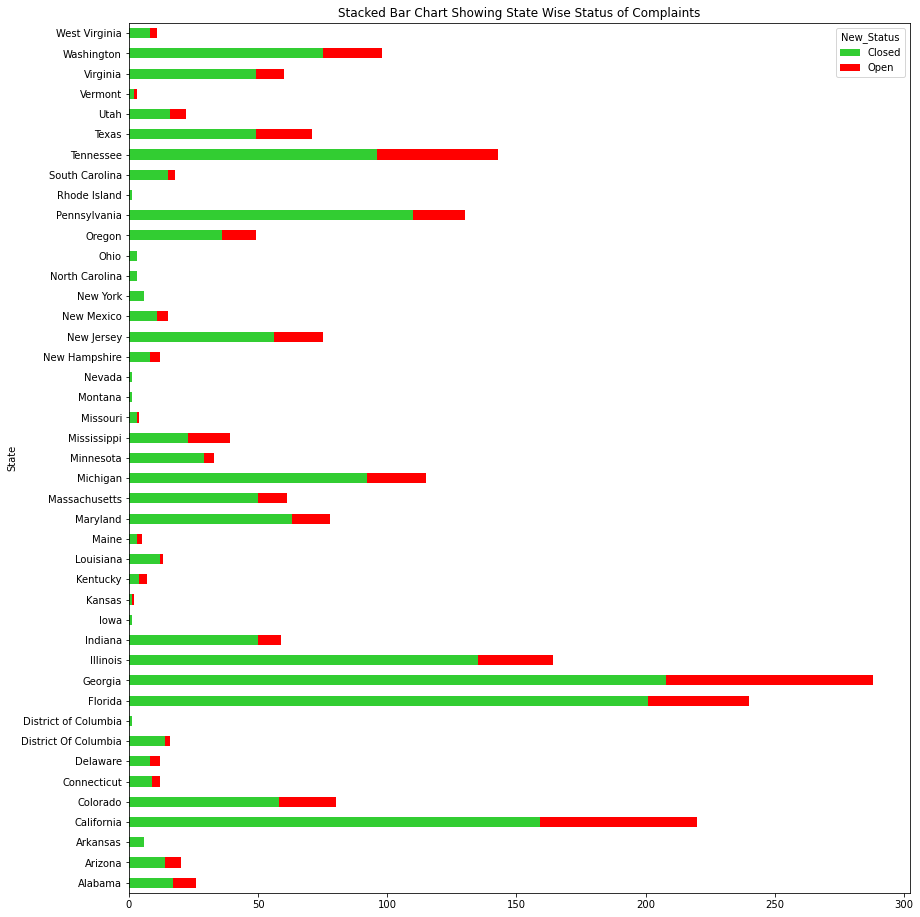

In [240]:
#plotting a state wise status of complaints in a stacked bar chart
colors={'Open':'red','Closed':'limegreen'}
CTCC_Data_State_Wise_Status.plot(kind='barh',figsize=(14,16),stacked=True,color=colors,
                                 title='Stacked Bar Chart Showing State Wise Status of Complaints') 

#### Which state has the maximum complaints?

In [169]:
CTCC_Data.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1)[:5]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143


*Seeing the stacked bar chart and the above result we can say that maximum complaints are from the State called __Georgia__ (It has 288 number of complaints)*

#### Which state has the highest percentage of unresolved complaints?

In [195]:
#Calculating the percenting of unresolved complaints state wise
CTCC_Data_State_Wise_Status['Percentage of Unresolved Complaints']=(CTCC_Data_State_Wise_Status['Open']/CTCC_Data_State_Wise_Status['Open'].sum())*100
CTCC_Data_State_Wise_Status.head()

New_Status,Closed,Open,Percentage of Unresolved Complaints
State,,,
Alabama,17,9,1.740812
Arizona,14,6,1.160542
Arkansas,6,0,0.000000
California,159,61,11.798839
Colorado,58,22,4.255319


In [198]:
CTCC_Data_State_Wise_Status['Percentage of Unresolved Complaints'].sort_values(ascending=False).head()

State
Georgia       15.473888
California    11.798839
Tennessee      9.090909
Florida        7.543520
Illinois       5.609284
Name: Percentage of Unresolved Complaints, dtype: float64

*From the above result we find that __Georgia__ has the highest percentage of unresolved complaints compare to other states.Lets Show this by plotting a __bar chart__*

Text(0.5, 1.0, 'Highest percentage of unresolved complaints\n')

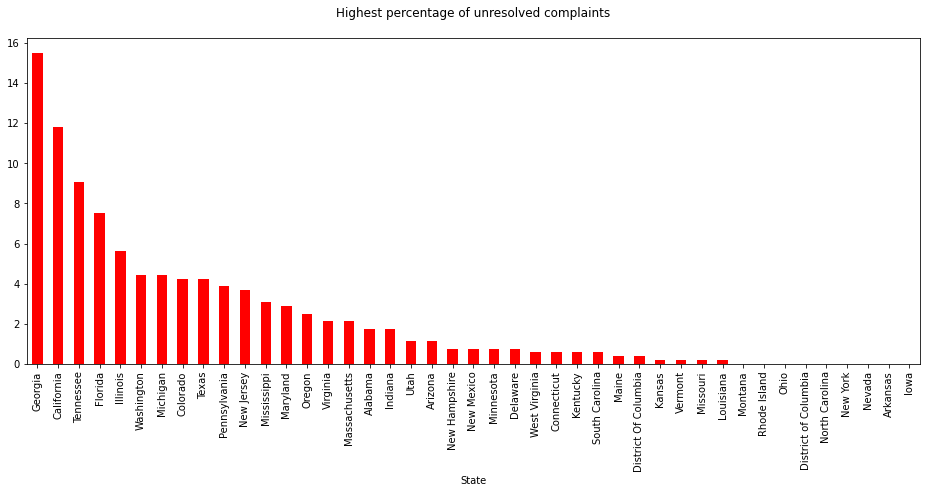

In [220]:
CTCC_Data_State_Wise_Status['Percentage of Unresolved Complaints'].sort_values(ascending=False).plot(kind='bar',figsize=(16,6),color="r")
plt.title('Highest percentage of unresolved complaints\n')

### 5. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care call

In [241]:
# Checking for unique values in Received Via Column of CTCC_Data
print("The Unique Values in the Received Via Variable \n",CTCC_Data['Received Via'].unique())

The Unique Values in the Received Via Variable 
 ['Customer Care Call' 'Internet']


*There are __2__ Unique values'Customer Care Call' and 'Internet' in the Received via variable*

In [242]:
#count of complaints resolved till date
CTCC_Data.New_Status.value_counts()

Closed    1707
Open       517
Name: New_Status, dtype: int64

This shows 1707 complaints are resolved or closed

<AxesSubplot:title={'center':'Percentage of Complaints Resolved till date which were received through Internet and Customer care call\n'}, ylabel='New_Status'>

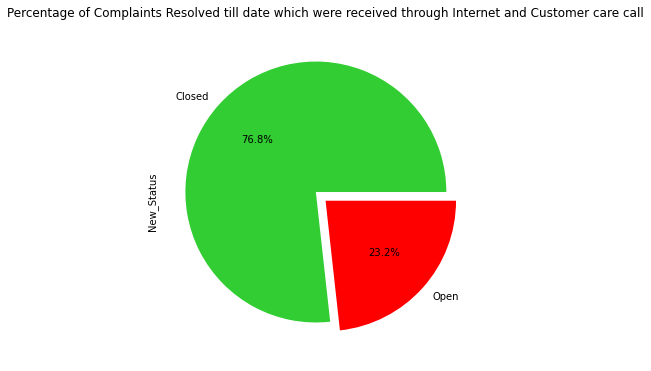

In [253]:
# Using autopct='%1.1f%%' to show percentage under the pie chart
mycolor=['limegreen','red']
myexplode = [0.1, 0]
plt.title('Percentage of Complaints Resolved till date which were received through Internet and Customer care call\n')
CTCC_Data.New_Status.value_counts().plot(kind='pie',explode = myexplode,colors=mycolor,autopct='%1.1f%%',figsize = (14,6))

*From the plot we can conclude that __76.8%__ of percentage of complaints resolved till date, which were received through the Internet and customer care call*